In [1]:
from utils import get_table, hash_states

In [2]:
dataset_df = get_table()
display(dataset_df)

,battery_level,battery_plugged,battery_status,day,month,packages_running_android,packages_running_ch.smalltech.battery.free,packages_running_com.android.bluetooth,packages_running_com.android.calculator2,packages_running_com.android.chrome,...,packages_running_com.googlecode.pythonforandroid,packages_running_com.halfbrick.fruitninjafree,packages_running_com.rovio.angrybirdsspace.ads,packages_running_com.tf.thinkdroid.sg,packages_running_de.kicktipp.mbookmark,packages_running_edu.udo.cs.ess.mobidac.target,packages_running_org.openintents.filemanager,packages_running_stream.android,slot,year
0,25.0,1.0,2.0,31.0,8.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,2012.0
1,3.0,0.0,0.0,31.0,8.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,2012.0
2,1.0,1.0,4.5,31.0,8.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,2012.0
3,0.0,1.0,5.0,31.0,8.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12.0,2012.0
4,0.0,0.5,4.0,31.0,8.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,16.0,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2464,0.0,0.0,0.0,7.0,3.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,31.0,2013.0
2465,-1.0,0.0,3.0,7.0,3.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,32.0,2013.0
2466,-1.0,0.0,3.0,7.0,3.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,36.0,2013.0
2467,0.0,0.0,0.0,7.0,3.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,38.0,2013.0


In [3]:
# get the name of the packages that is running in the system
text = 'packages_running_'
running_packages = [i for i in dataset_df.columns if text in i]


for package in running_packages:
    print(package, ':', dataset_df[package].unique())

# creating the activity vector containing info about running apps and battery_plugged
extra_columns = ['battery_plugged']
activity_vectors_df = dataset_df[[*extra_columns, *running_packages]]
activity_vectors = activity_vectors_df.dropna().to_numpy()

print(activity_vectors.shape)

# battery usage for each activity vector
battery_usage = dataset_df['battery_level'].to_list()

packages_running_android : [ 1. nan  0.]
packages_running_ch.smalltech.battery.free : [ 0.  1. nan]
packages_running_com.android.bluetooth : [ 0.  1. nan]
packages_running_com.android.calculator2 : [ 0.  1. nan]
packages_running_com.android.chrome : [ 1.  0. nan]
packages_running_com.android.contacts : [ 0.  1. nan]
packages_running_com.android.defcontainer : [ 0.  1. nan]
packages_running_com.android.keychain : [ 0.  1. nan]
packages_running_com.android.launcher : [ 1. nan  0.]
packages_running_com.android.mms : [ 0.  1. nan]
packages_running_com.android.musicfx : [ 0.  1. nan]
packages_running_com.android.nfc : [ 1. nan  0.]
packages_running_com.android.noisefield : [ 1. nan  0.]
packages_running_com.android.packageinstaller : [ 0.  1. nan]
packages_running_com.android.phone : [ 1. nan  0.]
packages_running_com.android.providers.applications : [ 1.  0. nan]
packages_running_com.android.providers.calendar : [ 1.  0. nan]
packages_running_com.android.providers.contacts : [ 1.  0. nan]


In [4]:
import numpy as np

test_array = activity_vectors#np.random.randint(low=2, size=(100, N))
N = test_array.shape[-1]
print(test_array.shape)
print(test_array[0:4])

def state_to_ind(s):
    return s @ 2 ** np.arange(s.shape[-1]-1, -1, -1)

inds = state_to_ind(test_array)
print(inds.max())
print(np.unique(inds).shape)

(2468, 66)
[[1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0.
  1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0.
  1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0.
  1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0.]
 [1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0.
  1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0.]]
5.888174852295842e+18
(578,)


In [5]:
import time
start = time.time()
arr2d = activity_vectors
out = hash_states(arr2d)
print('Took', time.time()-start, 'seconds!')
print(arr2d[:10])
print(out[:10])

Took 0.002178668975830078 seconds!
[[1.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  1.  1.  0.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  0.  0.  1.  1.  1.  1.  0.
  1.  1.  1.  1.  1.  0.  0.  0.  1.  1.  1.  0.  1.  1.  0.  0.  0.  1.
  1.  0.  1.  1.  0.  0.  0.  0.  0.  1.  0.  0. ]
 [0.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  1.  1.  0.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  0.  0.  1.  1.  1.  1.  0.
  1.  1.  1.  1.  1.  0.  0.  0.  1.  1.  1.  0.  1.  1.  0.  0.  0.  1.
  1.  0.  1.  1.  0.  0.  0.  0.  0.  1.  0.  0. ]
 [1.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  1.  1.  0.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  0.  0.  1.  1.  1.  1.  0.
  1.  1.  1.  1.  1.  0.  0.  0.  1.  1.  1.  0.  1.  1.  0.  0.  0.  1.
  1.  0.  1.  1.  1.  0.  0.  0.  0.  1.  0.  0. ]
 [1.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  1.  1.  0.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  0.  0.  1.  1.  1.  1.  0.
  1.  1. 

In [6]:
start = time.time()
arr2d = activity_vectors
out = hash_states(arr2d)
print('Took', time.time()-start, 'seconds!')
print(arr2d[:10])
print(out[:10])
print(out.max())
print(out.shape)

Took 0.001969575881958008 seconds!
[[1.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  1.  1.  0.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  0.  0.  1.  1.  1.  1.  0.
  1.  1.  1.  1.  1.  0.  0.  0.  1.  1.  1.  0.  1.  1.  0.  0.  0.  1.
  1.  0.  1.  1.  0.  0.  0.  0.  0.  1.  0.  0. ]
 [0.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  1.  1.  0.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  0.  0.  1.  1.  1.  1.  0.
  1.  1.  1.  1.  1.  0.  0.  0.  1.  1.  1.  0.  1.  1.  0.  0.  0.  1.
  1.  0.  1.  1.  0.  0.  0.  0.  0.  1.  0.  0. ]
 [1.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  1.  1.  0.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  0.  0.  1.  1.  1.  1.  0.
  1.  1.  1.  1.  1.  0.  0.  0.  1.  1.  1.  0.  1.  1.  0.  0.  0.  1.
  1.  0.  1.  1.  1.  0.  0.  0.  0.  1.  0.  0. ]
 [1.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  1.  1.  0.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  0.  0.  1.  1.  1.  1.  0.
  1.  1. 

In [7]:
help(hash_states)

Help on function hash_states in module utils:

hash_states(state_batch)
    Converts a batch of states or activity vectors to a sequence of unique integer labels
    
    This function assumes that the batch of states is a numpy array shaped (num_states, dim_state).
    The output is a numpy array shaped (num_states, ) containing integer labels in the range between
    0 and num_unique_states-1. Be sure to pass all relevant states at once.



In [8]:
dataset_df = get_table()
display(dataset_df)

# get the name of the packages that is running in the system
text = 'packages_running_'
running_packages = [i for i in dataset_df.columns if text in i]

# creating the activity vector containing info about running apps and battery_plugged
extra_columns = ['battery_plugged']
activity_vectors_df = dataset_df[[*extra_columns, *running_packages]]
activity_vectors = activity_vectors_df.dropna().to_numpy()

# battery usage for each activity vector
battery_usage = dataset_df['battery_level'].to_list()
print(battery_usage)

# convert to a sequence of labels, note that nan was dropped above
out_labels = hash_states(activity_vectors)
print(activity_vectors[:10])
print(out_labels[:20])

,battery_level,battery_plugged,battery_status,day,month,packages_running_android,packages_running_ch.smalltech.battery.free,packages_running_com.android.bluetooth,packages_running_com.android.calculator2,packages_running_com.android.chrome,...,packages_running_com.googlecode.pythonforandroid,packages_running_com.halfbrick.fruitninjafree,packages_running_com.rovio.angrybirdsspace.ads,packages_running_com.tf.thinkdroid.sg,packages_running_de.kicktipp.mbookmark,packages_running_edu.udo.cs.ess.mobidac.target,packages_running_org.openintents.filemanager,packages_running_stream.android,slot,year
0,25.0,1.0,2.0,31.0,8.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,2012.0
1,3.0,0.0,0.0,31.0,8.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,2012.0
2,1.0,1.0,4.5,31.0,8.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,2012.0
3,0.0,1.0,5.0,31.0,8.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12.0,2012.0
4,0.0,0.5,4.0,31.0,8.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,16.0,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2464,0.0,0.0,0.0,7.0,3.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,31.0,2013.0
2465,-1.0,0.0,3.0,7.0,3.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,32.0,2013.0
2466,-1.0,0.0,3.0,7.0,3.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,36.0,2013.0
2467,0.0,0.0,0.0,7.0,3.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,38.0,2013.0


[25.0, 3.0, 1.0, 0.0, 0.0, 0.0, -2.0, -3.0, -3.0, -3.0, -3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, -2.0, 0.0, -5.0, -3.0, -1.0, 0.0, -1.0, -3.0, -1.0, -1.0, -1.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, -4.0, -2.0, -4.0, -3.0, -2.0, -3.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, -7.0, -2.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.0, -1.0, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -2.0, -1.0, -1.0, -1.0, 0.0, 0.0, 0.0, 0.0, -1.0, -1.0, 0.0, 0.0, 21.0, 28.0, 24.0, 12.0, 4.0, 0.0, 0.0, 0.0, 0.0, -1.0, -2.0, -2.0, -1.0, -1.0, 0.0, 0.0, -1.0, -1.0, -1.0, -1.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 10.0, 11.0, 6.0, 0.0, 0.0, 0.0, 0.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.0, -1.0, -1.0, 0.0, 0.0, -1.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.0, -2.0, -2.0, -3.0, -4.0, -2.0, -1.0, -3.0, -2.0, -4.0, -5.0, -5.0, -1.0, -1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 1.0, 24.0, 29.0, 22.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, -1

In [9]:
print(np.isin(out_labels[:10, None],out_labels[4:8]))

[[False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]]


In [10]:
print(out_labels[0:3, None].shape)
print(out_labels[:10] == out_labels[0:3, None])
print(np.argwhere(out_labels[:10] == out_labels[0:3, None]))

(3, 1)
[[ True False False False False False False False False False]
 [False  True False False False False False False False False]
 [False False  True  True False False False False False False]]
[[0 0]
 [1 1]
 [2 2]
 [2 3]]


In [11]:
indx = out_labels.argsort()  # indices that would sort the array
i = np.searchsorted(out_labels[indx], out_labels[42:100])  # indices in the sorted array
print(indx[i])  # indices with respect to the original array
print((activity_vectors[indx[i]] - activity_vectors[42:100]).sum())
print(out_labels.min())

[ 36  43  44  44  46  47  48  49  51  51  53  53  53  53  56  59  59  59
  61  61  61  61  66  66  66  66  66  69  69  69  69  69  69  69  69 513
  79  79  80  80  80  80  84  86  86  89  88  89  92  91  92  93  93  93
  93  93  93  93]
0.0
0


In [12]:
from utils import lookup_states
print(np.atleast_1d(out_labels[3]).shape)
print(out_labels[0:4].shape)
tmp = lookup_states(out_labels[0:4], out_labels, activity_vectors)
print(tmp.shape)
print(tmp)
print()
print(activity_vectors[[10, 11, 1, 3]])
print((tmp-activity_vectors[[10, 11, 0, 3]]).sum())

(1,)
(4,)
(4, 66)
[[1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0.
  1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0.
  1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0.
  1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0.]
 [1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0.
  1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0.]]

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
  1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0.
  1. 1. 0. 0

In [13]:
print(help(lookup_states))

Help on function lookup_states in module utils:

lookup_states(query, labels, state_batch)
    Converts a sequence of labels to the corresponding states, given a full sequence of labels and
    the corresponding batch of states.
    
    This function assumes that  query is a sequence of integer labels shaped (length_query, ), the labels
    are a sequence of integer labels shaped (num_states, ) and the batch of states is a numpy array shaped
    (num_states, dim_state).
    The output is a numpy array shaped (length_query, dim_state) containing the states corresponding to the
    query labels. If state_batch and labels are input and output to hash_states(), this function implements
    the inverse hash function for each element of the query.

None


In [14]:
dataset_df = get_table()
display(dataset_df)

# get the name of the packages that is running in the system
text = 'packages_running_'
running_packages = [i for i in dataset_df.columns if text in i]

# creating the activity vector containing info about running apps and battery_plugged
extra_columns = ['battery_plugged']
activity_vectors_df = dataset_df[[*extra_columns, *running_packages]]
activity_vectors = activity_vectors_df.dropna().to_numpy()

# battery usage for each activity vector
battery_usage = dataset_df['battery_level'].to_list()
print(battery_usage)

# convert to a sequence of labels, note that nan was dropped above
out_labels = hash_states(activity_vectors)
print(activity_vectors[:10])
print(out_labels[:10])

# given some labels, what states do they represent???
#labels for which we want to know the states
query = np.array([93, 160, 92]) 
#states represented by those labels, in the same order as query
answer = lookup_states(query, out_labels, activity_vectors)
print(answer.shape)

,battery_level,battery_plugged,battery_status,day,month,packages_running_android,packages_running_ch.smalltech.battery.free,packages_running_com.android.bluetooth,packages_running_com.android.calculator2,packages_running_com.android.chrome,...,packages_running_com.googlecode.pythonforandroid,packages_running_com.halfbrick.fruitninjafree,packages_running_com.rovio.angrybirdsspace.ads,packages_running_com.tf.thinkdroid.sg,packages_running_de.kicktipp.mbookmark,packages_running_edu.udo.cs.ess.mobidac.target,packages_running_org.openintents.filemanager,packages_running_stream.android,slot,year
0,25.0,1.0,2.0,31.0,8.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,2012.0
1,3.0,0.0,0.0,31.0,8.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,2012.0
2,1.0,1.0,4.5,31.0,8.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,2012.0
3,0.0,1.0,5.0,31.0,8.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12.0,2012.0
4,0.0,0.5,4.0,31.0,8.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,16.0,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2464,0.0,0.0,0.0,7.0,3.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,31.0,2013.0
2465,-1.0,0.0,3.0,7.0,3.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,32.0,2013.0
2466,-1.0,0.0,3.0,7.0,3.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,36.0,2013.0
2467,0.0,0.0,0.0,7.0,3.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,38.0,2013.0


[25.0, 3.0, 1.0, 0.0, 0.0, 0.0, -2.0, -3.0, -3.0, -3.0, -3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, -2.0, 0.0, -5.0, -3.0, -1.0, 0.0, -1.0, -3.0, -1.0, -1.0, -1.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, -4.0, -2.0, -4.0, -3.0, -2.0, -3.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, -7.0, -2.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.0, -1.0, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -2.0, -1.0, -1.0, -1.0, 0.0, 0.0, 0.0, 0.0, -1.0, -1.0, 0.0, 0.0, 21.0, 28.0, 24.0, 12.0, 4.0, 0.0, 0.0, 0.0, 0.0, -1.0, -2.0, -2.0, -1.0, -1.0, 0.0, 0.0, -1.0, -1.0, -1.0, -1.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 10.0, 11.0, 6.0, 0.0, 0.0, 0.0, 0.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.0, -1.0, -1.0, 0.0, 0.0, -1.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.0, -2.0, -2.0, -3.0, -4.0, -2.0, -1.0, -3.0, -2.0, -4.0, -5.0, -5.0, -1.0, -1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 1.0, 24.0, 29.0, 22.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, -1

[[1.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  1.  1.  0.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  0.  0.  1.  1.  1.  1.  0.
  1.  1.  1.  1.  1.  0.  0.  0.  1.  1.  1.  0.  1.  1.  0.  0.  0.  1.
  1.  0.  1.  1.  0.  0.  0.  0.  0.  1.  0.  0. ]
 [0.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  1.  1.  0.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  0.  0.  1.  1.  1.  1.  0.
  1.  1.  1.  1.  1.  0.  0.  0.  1.  1.  1.  0.  1.  1.  0.  0.  0.  1.
  1.  0.  1.  1.  0.  0.  0.  0.  0.  1.  0.  0. ]
 [1.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  1.  1.  0.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  0.  0.  1.  1.  1.  1.  0.
  1.  1.  1.  1.  1.  0.  0.  0.  1.  1.  1.  0.  1.  1.  0.  0.  0.  1.
  1.  0.  1.  1.  1.  0.  0.  0.  0.  1.  0.  0. ]
 [1.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  1.  1.  0.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  0.  0.  1.  1.  1.  1.  0.
  1.  1.  1.  1.  1.  0.  0.  0.  1.  1.  1.

In [15]:
dims = (out_labels.max()+1, out_labels.max()+1)
print(np.bincount(np.ravel_multi_index((out_labels[:-1], out_labels[1:]), dims).ravel()))
print(np.bincount(np.ravel_multi_index((out_labels[:-1], out_labels[1:]), dims), minlength=(out_labels.max()+1)**2).reshape(dims))

[0 0 0 ... 0 0 1]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 2 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [16]:
print(np.ravel_multi_index((out_labels[:-1], out_labels[1:]), dims)[10:20])
print(out_labels[10:20])
print((out_labels.max()+1)**2)

[162435 162435 162435 162435 162435 162435 162435 162436 163098 163107]
[245 245 245 245 245 245 245 245 246 246]
438244


In [17]:
P_test = np.bincount(np.ravel_multi_index((out_labels[:-1], out_labels[1:]), dims), minlength=(out_labels.max()+1)**2).reshape(dims)
print(P_test.shape)
print(P_test[248,248])
print((out_labels==245).sum())
print((out_labels[:20]))
print(P_test[245,245])

(662, 662)
1
12
[ 93  92 248 248 160 247 245 245 245 245 245 245 245 245 245 245 245 245
 246 246]
11


In [18]:
from utils import count_transitions
print(out_labels.max())
start = time.time()
T = count_transitions(out_labels, num_states=663)
print('Took', time.time()-start, 'seconds!')
print(T.shape)
print(T.sum()-T[:662,:662].sum())

661
Took 0.002783536911010742 seconds!
(663, 663)
0.0


In [19]:
dummy_labels = np.random.permutation(np.append(np.arange(6),[5,5,4,3,5]))
dummy_T = count_transitions(dummy_labels)
print(dummy_labels)
print(dummy_T)
print(dummy_T.shape)
print(dummy_T.dtype)

[5 2 0 4 3 3 1 5 4 5 5]
[[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 1.]]
(6, 6)
float64


In [20]:
# Count how many times each label has transitioned to each other label
T = count_transitions(out_labels)
# How many times has the state with the label 245 transitioned to the state with the label 246?
print(T[245, 246])
# How many times has the state with the label 246 transitioned to itself?
print(T[245, 245])
# How many times has the state with the label 246 transitioned to the state with the label 245?
print(T[246, 245])

0.0
11.0
1.0


In [21]:
print(help(count_transitions))

Help on function count_transitions in module utils:

count_transitions(sequence, num_states=None)
    Given a sequence of suitable integer labels, returns a matrix T[i,j] counting the number of observed
    transitions from label j to label i.
    
    This function assumes that  sequence is a numpy array shaped (length_sequence, ). By default, the output shape
    is a numpy array shaped (num_unique_states, num_unique_states). This number is inferred from labels in the
    sequence.
    If you want to aggregate counts from different (groups of) sequences, where an individual sequence does not
    necessarily contain each state, pass the number of unique states manually to num_states. You can then sum the
    outputs of this function for each sequence passed. The indexing is specified in lecture 10, on slide 8.

None


In [22]:
from utils import one_hot_encode, one_hot_decode


print(out_labels[:4])
print(out_labels[:4].shape)
test_encode = one_hot_encode(out_labels[:4], num_states=out_labels.max()+1)
print(test_encode.shape)

print(test_encode[248, 2])

test_decode = one_hot_decode(test_encode)
print(test_decode.shape)
print(test_decode)


test_encode = one_hot_encode(test_decode, num_states=out_labels.max()+1)
print(test_encode.shape)

print(test_encode.dtype)

test_decode = one_hot_decode(test_encode)
print(test_decode.shape)
print(test_decode)


print((test_decode == out_labels[:4]).all())

T_test = count_transitions(out_labels)
print(T_test.shape)

print((T_test @ test_encode).shape)

###fix shapes!
###we need T @ encoded_vec to work

[ 93  92 248 248]
(4,)
(662, 4)
1.0
(4,)
[ 93  92 248 248]
(662, 4)
float64
(4,)
[ 93  92 248 248]
True
(662, 662)
(662, 4)


In [23]:
from utils import normalize_transition_matrix
dummy_labels = np.random.permutation(np.append(np.arange(5), [3,3]))
dummy_T = None
dummy_T = count_transitions(dummy_labels)
dummy_T = dummy_T 
dummy_T_norm = normalize_transition_matrix(dummy_T)
print(dummy_T)
print(dummy_labels)
print(dummy_T_norm)
print(np.maximum(dummy_T.sum(-1, keepdims=True), 1))
print(dummy_T_norm.shape)

dummy_encoded = one_hot_encode(dummy_labels)
print(dummy_encoded[:, 4])
print((dummy_T_norm) @ dummy_encoded[:, 4])


print(np.power(dummy_T_norm, dummy_T).prod())

[[0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 1. 1.]
 [0. 1. 0. 0. 0.]]
[0 3 3 2 1 4 3]
[[0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.5 0. ]
 [1.  0.  0.  0.5 1. ]
 [0.  1.  0.  0.  0. ]]
[[1.]
 [1.]
 [1.]
 [3.]
 [1.]]
(5, 5)
[0. 1. 0. 0. 0.]
[0. 0. 0. 0. 1.]
0.25


In [24]:
print(ord('C')-ord('A'))

2


In [25]:
lines = open('lecture_example.txt','r')

char_list = []
for line in lines:
    line = line.split()
    for char in line[0]:
        char_list.append(ord(char)-ord('A'))

char_list = np.array(char_list)
print(char_list)

T_test = count_transitions(char_list)
T_norm = normalize_transition_matrix(T_test)
print(T_norm)

[1 2 0 0 1 0 1 0 1 2 1 1 2 0 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 0 1 1 1 0 1 1
 0 0 1 2 2 2 1 2 0 2 0 2 1 0 1 2 2 1 0 1 1 1 2 2 0 0 2 2 0 2 2 2 0 2 0 2 2
 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 0 1 2 2 2 2 2 2 2 2 1 2 0 1 0 2 0 2 2 0 1 1
 0 1 0 2 0 1 2 2 2 0 1 2 2 1 2 2 0 1 1 1 1 2 2 0 1 0 1 1 2 2 2 0 1 2 2 1 2
 0 1 2 2 1 1 1 0 0 1 1 2 2 2 2 2 0 2 2 2 2 2 0 1 2 0 1 2 1 0 1 2 1 2 0 2 2
 0 2 0 0 0 1 1 2 0 1 2 0 2 2 2 2 2 2 0 1 1 0 0 1 0]
[[0.14583333 0.24137931 0.27184466]
 [0.5625     0.31034483 0.11650485]
 [0.29166667 0.44827586 0.61165049]]


In [26]:
lines = open('lecture_example.txt','r')
char_list = []
for line in lines:
    line = line.split()
    for char in line[0]:
        char_list.append(ord(char)-ord('A'))

char_list = np.array(char_list)
print(char_list)

T_sanity_check = count_transitions(char_list)
P_sanity_check = normalize_transition_matrix(T_sanity_check)
print(T_sanity_check)
print((char_list == 1).sum())
print(P_sanity_check)

[1 2 0 0 1 0 1 0 1 2 1 1 2 0 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 0 1 1 1 0 1 1
 0 0 1 2 2 2 1 2 0 2 0 2 1 0 1 2 2 1 0 1 1 1 2 2 0 0 2 2 0 2 2 2 0 2 0 2 2
 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 0 1 2 2 2 2 2 2 2 2 1 2 0 1 0 2 0 2 2 0 1 1
 0 1 0 2 0 1 2 2 2 0 1 2 2 1 2 2 0 1 1 1 1 2 2 0 1 0 1 1 2 2 2 0 1 2 2 1 2
 0 1 2 2 1 1 1 0 0 1 1 2 2 2 2 2 0 2 2 2 2 2 0 1 2 0 1 2 1 0 1 2 1 2 0 2 2
 0 2 0 0 0 1 1 2 0 1 2 0 2 2 2 2 2 2 0 1 1 0 0 1 0]
[[ 7. 14. 28.]
 [27. 18. 12.]
 [14. 26. 63.]]
58
[[0.14583333 0.24137931 0.27184466]
 [0.5625     0.31034483 0.11650485]
 [0.29166667 0.44827586 0.61165049]]


In [27]:
dataset_df = get_table()
display(dataset_df)

# get the name of the packages that is running in the system
text = 'packages_running_'
running_packages = [i for i in dataset_df.columns if text in i]

# creating the activity vector containing info about running apps and battery_plugged
extra_columns = ['battery_plugged']
activity_vectors_df = dataset_df[[*extra_columns, *running_packages]]
activity_vectors = activity_vectors_df.dropna().to_numpy()

# battery usage for each activity vector
battery_usage = dataset_df['battery_level'].to_list()
print(battery_usage)

# convert to a sequence of labels, note that nan was dropped above
out_labels = hash_states(activity_vectors)
print(activity_vectors[:10])
print(out_labels[:10])

# given some labels, what states do they represent???
#labels for which we want to know the states
query = np.array([93, 160, 92]) 
#states represented by those labels, in the same order as query
answer = lookup_states(query, out_labels, activity_vectors)
print(answer.shape)



,battery_level,battery_plugged,battery_status,day,month,packages_running_android,packages_running_ch.smalltech.battery.free,packages_running_com.android.bluetooth,packages_running_com.android.calculator2,packages_running_com.android.chrome,...,packages_running_com.googlecode.pythonforandroid,packages_running_com.halfbrick.fruitninjafree,packages_running_com.rovio.angrybirdsspace.ads,packages_running_com.tf.thinkdroid.sg,packages_running_de.kicktipp.mbookmark,packages_running_edu.udo.cs.ess.mobidac.target,packages_running_org.openintents.filemanager,packages_running_stream.android,slot,year
0,25.0,1.0,2.0,31.0,8.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,2012.0
1,3.0,0.0,0.0,31.0,8.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,2012.0
2,1.0,1.0,4.5,31.0,8.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,2012.0
3,0.0,1.0,5.0,31.0,8.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12.0,2012.0
4,0.0,0.5,4.0,31.0,8.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,16.0,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2464,0.0,0.0,0.0,7.0,3.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,31.0,2013.0
2465,-1.0,0.0,3.0,7.0,3.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,32.0,2013.0
2466,-1.0,0.0,3.0,7.0,3.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,36.0,2013.0
2467,0.0,0.0,0.0,7.0,3.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,38.0,2013.0


[25.0, 3.0, 1.0, 0.0, 0.0, 0.0, -2.0, -3.0, -3.0, -3.0, -3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, -2.0, 0.0, -5.0, -3.0, -1.0, 0.0, -1.0, -3.0, -1.0, -1.0, -1.0, 13.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, -4.0, -2.0, -4.0, -3.0, -2.0, -3.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, -7.0, -2.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.0, -1.0, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -2.0, -1.0, -1.0, -1.0, 0.0, 0.0, 0.0, 0.0, -1.0, -1.0, 0.0, 0.0, 21.0, 28.0, 24.0, 12.0, 4.0, 0.0, 0.0, 0.0, 0.0, -1.0, -2.0, -2.0, -1.0, -1.0, 0.0, 0.0, -1.0, -1.0, -1.0, -1.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 10.0, 11.0, 6.0, 0.0, 0.0, 0.0, 0.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.0, -1.0, -1.0, 0.0, 0.0, -1.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.0, -2.0, -2.0, -3.0, -4.0, -2.0, -1.0, -3.0, -2.0, -4.0, -5.0, -5.0, -1.0, -1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 1.0, 24.0, 29.0, 22.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, -1

In [28]:
from utils import state_dist_to_activity_dist, BCE

start = time.time()
losses = []
dataset_df = get_table()
text = 'packages_running_'
running_packages = [i for i in dataset_df.columns if text in i]
extra_columns = []#['battery_plugged']
activity_vectors_df = dataset_df[[*extra_columns, *running_packages]]
activity_vectors = activity_vectors_df.dropna().to_numpy()
out_labels = hash_states(activity_vectors)
helper_states = lookup_states(np.arange(0, out_labels.max()+1), out_labels, activity_vectors)
print(out_labels.max()+1)

N_steps = 0
for i in range(20):
    N_steps = i+1
    test_encode = one_hot_encode(out_labels[:-N_steps], num_states = out_labels.max() + 1)
    T_test = count_transitions(out_labels)
    P_test = normalize_transition_matrix(T_test)
    pred = np.power(P_test, N_steps)
    estimate = pred @ test_encode
    print('estimate shape:', estimate.shape)
    estimate_activity_dist = state_dist_to_activity_dist(estimate, out_labels, activity_vectors)
    print(estimate_activity_dist.shape)
    targets = lookup_states(out_labels[N_steps:], out_labels, activity_vectors)
    print(targets.shape)
    loss = BCE(estimate_activity_dist, targets)
    losses.append(loss.mean())
    if i % 50 == 0:
        print('loss:', losses[-1])

losses = np.array(losses)
print('Took ', time.time()-start, 'seconds!')

613
estimate shape: (613, 2467)
(2467, 65)
(2467, 65)
loss: 0.018056599383927684
estimate shape: (613, 2466)
(2466, 65)
(2466, 65)
estimate shape: (613, 2465)
(2465, 65)
(2465, 65)
estimate shape: (613, 2464)
(2464, 65)
(2464, 65)
estimate shape: (613, 2463)
(2463, 65)
(2463, 65)
estimate shape: (613, 2462)
(2462, 65)
(2462, 65)
estimate shape: (613, 2461)
(2461, 65)
(2461, 65)
estimate shape: (613, 2460)
(2460, 65)
(2460, 65)
estimate shape: (613, 2459)
(2459, 65)
(2459, 65)
estimate shape: (613, 2458)
(2458, 65)
(2458, 65)
estimate shape: (613, 2457)
(2457, 65)
(2457, 65)
estimate shape: (613, 2456)
(2456, 65)
(2456, 65)
estimate shape: (613, 2455)
(2455, 65)
(2455, 65)
estimate shape: (613, 2454)
(2454, 65)
(2454, 65)
estimate shape: (613, 2453)
(2453, 65)
(2453, 65)
estimate shape: (613, 2452)
(2452, 65)
(2452, 65)
estimate shape: (613, 2451)
(2451, 65)
(2451, 65)
estimate shape: (613, 2450)
(2450, 65)
(2450, 65)
estimate shape: (613, 2449)
(2449, 65)
(2449, 65)
estimate shape: (61

[0.0180566  0.30018581 0.55680811 0.80829802 1.05681148 1.30561509
 1.55489116 1.80625728 2.04519679 2.27455652 2.50562206 2.71219129
 2.91622979 3.11083336 3.29195318 3.45936508 3.62553058 3.77672166
 3.9285871  4.06660937]


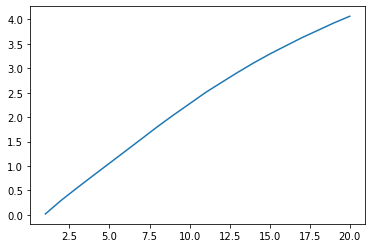

In [29]:
print(losses)
import matplotlib.pyplot as plt
plt.plot(np.arange(losses.shape[0])+1, losses)
plt.show()

In [30]:
from utils import state_dist_to_activity_dist, BCE
# very simple prediction and loss calculation example (not partioned into train/valid/test sets!)
# battery still needs adjustment, contains strange values != 0 or 1, so it isn't included here
activity_vectors_df = dataset_df[running_packages] 
activity_vectors = activity_vectors_df.dropna().to_numpy()
out_labels = hash_states(activity_vectors)
# number of prediction steps into the future
N_steps = 1
one_hot_prediction_input = one_hot_encode(out_labels[:-N_steps], num_states = out_labels.max() + 1)
T = count_transitions(out_labels)
print('T max:', T.max())
P = normalize_transition_matrix(T)
pred = np.power(P, N_steps)
# calculate a distribution over future states
estimate = pred @ one_hot_prediction_input 
# convert to sets of individual distributions over activity components
estimate_activity_dist = state_dist_to_activity_dist(estimate, out_labels, activity_vectors)
# simple targets - just time-shifted the input by N_steps
targets = lookup_states(out_labels[N_steps:], out_labels, activity_vectors)
# calculate loss
loss = BCE(estimate_activity_dist, targets)
# print reduced loss
print('Prediction loss over the whole dataset for', N_steps, 'time-steps:', loss.mean())

print(estimate[:, 2].argmax())
print(estimate[:, 2].max())
print(out_labels[:10])
print(P[:, 227].max())

T max: 60.0
Prediction loss over the whole dataset for 1 time-steps: 0.018056599383927684
150
0.5
[ 87  87 227 227 150 226 224 224 224 224]
0.5


In [31]:
print('Number of running packages:', len(running_packages))
activity_vectors_df = dataset_df[running_packages[:49]+running_packages[50:54]+running_packages[55:]]
print('...after removing some:', len(running_packages[:49]+running_packages[50:54]+running_packages[55:]))
activity_vectors_df = activity_vectors_df[dataset_df['battery_level'] <= 0.]
activity_vectors_df = activity_vectors_df.T.drop_duplicates().T
activity_vectors = activity_vectors_df.dropna().to_numpy()
x = activity_vectors
print('Final data shape:', x.shape)
X = np.concatenate([np.ones((x.shape[0],1)), x], axis=-1).T
print('X shape:', X.shape)
print('X.T shape:', X.T.shape)
y = dataset_df['battery_level'].dropna().to_numpy()
y = y[y <= 0.]
print('Targets shape:', y.shape)
print('Hat matrix shape:', (X @ X.T).shape)
w = np.linalg.inv(X @ X.T) @ X @ y
print('Weights Shape:', w.shape)
print(np.abs(X.T @ w - y).mean())

Number of running packages: 65
...after removing some: 63
Final data shape: (2333, 44)
X shape: (45, 2333)
X.T shape: (2333, 45)
Targets shape: (2333,)
Hat matrix shape: (45, 45)
Weights Shape: (45,)
0.7015144094982482


In [32]:
A = np.array([0])
B = np.array([0])
print(np.power(A, B))

[1]


In [33]:
import numpy as np
from sympy import exp, log, Float, Sum, Array
from sympy.matrices import Matrix

np.random.seed(123)
P = np.random.rand(1500)

start = time.time()
p = np.log(P)
p = np.sum(p)
print('Numpy log sum:', p)
p = np.exp(p)
print('Numpy exp out:', p) # we see, that exp(\sum log(x)) also quickly reaches its limits
print('Numpy took', time.time()-start, 'seconds.\n')

start = time.time()
# converting computations into logspace might be still necessary
p = Matrix(P)
p = p.applyfunc(log)
_p = Float(0)
for m in p:
    _p += m
print('Sympy log sum:', _p)
print('Sympy exp out:', Matrix([_p]).applyfunc(exp))
# you noticed that execution of this cell took noticably longer than the cell above
# -> when you use sympy in your project, 
#    parallelize the loop that computes the expectation for the transition matrix!
print('Sympy loop took', time.time()-start, 'seconds.\n')

start = time.time()
A = np.log(P)
A = np.sum(A)
print('Numpy log sum:', A)
p = Float(A)
print('Sympy exp out quick:', Matrix([p]).applyfunc(exp))
# you noticed that execution of this cell took noticably longer than the cell above
# -> when you use sympy in your project, 
#    parallelize the loop that computes the expectation for the transition matrix!
print('Numpy + Sympy mix took', time.time()-start, 'seconds.\n')

Numpy log sum: -1546.5320650128235
Numpy exp out: 0.0
Numpy took 0.0002579689025878906 seconds.

Sympy log sum: -1546.53206501283
Sympy exp out: Matrix([[2.23695927951156e-672]])
Sympy loop took 0.5690851211547852 seconds.

Numpy log sum: -1546.5320650128235
Sympy exp out quick: Matrix([[2.23695927951512e-672]])
Numpy + Sympy mix took 0.0009377002716064453 seconds.



In [34]:
print(np.finfo(np.float128))

# randomly sample several transition matrices
limit = 100
num_samples = 1000
num_states = 50
T_data = np.random.randint(limit, size=(num_states, num_states)).astype(np.float128)
S = np.random.randint(limit, size=(num_samples, num_states, num_states)).astype(np.float128)
print('sample shape:', S.shape)
S = normalize_transition_matrix(S)
print(S[0].sum(0))

tmp = np.power(S, T_data)
print(tmp.shape)
tmp = tmp.prod(axis=(-1,-2))
print(tmp.shape)
print(tmp.min(), tmp.max())

tmp_log = T_data * np.log(np.maximum(S, 1e-50))
print(tmp_log.shape)
tmp_log = tmp_log.sum(axis=(-1,-2))
print(tmp_log.min(), tmp_log.max())
print(tmp_log.shape)
tmp = np.exp(tmp_log)
tmp_sympy = Matrix(tmp_log).applyfunc(exp)
print(tmp.min(), tmp.max())
print(min(tmp_sympy), max(tmp_sympy))
test = Matrix(S[0]) * tmp_sympy[0]
start = time.time()
#for i in range(num_samples-1):
   # test += Matrix(S[i+1]) * tmp_sympy[i+1]
   # if i % 50 == 0:
     #   print(i)
print('Done in', time.time()-start, 'seconds.')

Machine parameters for float128
---------------------------------------------------------------
precision =  18   resolution = 1e-18
machep =    -63   eps =        1.084202172485504434e-19
negep =     -64   epsneg =     5.42101086242752217e-20
minexp = -16382   tiny =       3.3621031431120935063e-4932
maxexp =  16384   max =        1.189731495357231765e+4932
nexp =       15   min =        -max
---------------------------------------------------------------

sample shape: (1000, 50, 50)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
(1000, 50, 50)
(1000,)
0.0 0.0
(1000, 50, 50)
-761333.2040142308373 -573508.6848338351002
(1000,)
0.0 0.0
1.55098249739785938e-330643 2.20218131914483801e-249072
Done in 2.6702880859375e-05 seconds.


import mpmath as mp
start = time.time()
mp.dps = 25
eps = 1e-25
#print(np.finfo(np.float128))
np.random.seed(123)
# randomly sample several transition matrices
limit = 100
num_samples = 10000
num_states = 70#4
T_data = np.random.randint(limit, size=(num_states, num_states))#count_transitions(traj)#
S_from_T = normalize_transition_matrix(T_data)

S = np.random.randint(limit, size=(num_samples, num_states, num_states))
print('sample shape:', S.shape)
S = normalize_transition_matrix(S)
print('T_data shape:', T_data.shape)
tmp_log = T_data * np.log(np.maximum(S, eps))
print('tmp_log shape:', tmp_log.shape)
tmp_log = tmp_log.sum(axis=(-1,-2))
print('tmp_log shape after sum:', tmp_log.shape)
exp = np.vectorize(mp.exp)
tmp_exp = exp(tmp_log.astype(object) * mp.mpf('1'))
print('tmp_exp shape:', tmp_exp.shape)
S_weighted =  S * tmp_exp[:, None, None] 
print('S_weighted shape:', S_weighted.shape)
S_expectation = S_weighted.sum(axis=0)
print('S_expectation shape:', S_expectation.shape)
eta = tmp_exp.sum()
print('eta:', eta) #7.53045551370327e-506230
S_res = (1/eta * S_expectation).astype(np.float64)
print('Result dtype:', S_res.dtype)
#S_prev = np.load('prev.npy')
np.save('prev.npy', S_res)
print(S_res.shape)
#print('Result changed?', not np.allclose(S_res, S_prev))

print('Cell execution took', time.time()-start, 'seconds.')

del S_res, eta, S_expectation, S_weighted, tmp_exp, tmp_log, S, S_from_T, T_data

In [35]:
from multiprocessing import Pool, cpu_count

def exp(arg):
    return np.vectorize(mp.exp)(arg)

def mul_sum(args):
    A, b = args
    return (A * b[:, None, None]).sum(axis=0)

from multiprocessing import Pool, cpu_count

def exp(arg):
    return np.vectorize(mp.exp)(arg)

def mul_sum(args):
    A, b = args
    return (A * b[:, None, None]).sum(axis=0)

start = time.time()
mp.dps = 25
eps = 1e-25
#print(np.finfo(np.float128))
np.random.seed(123)
# randomly sample several transition matrices
limit = 100
num_samples = 10000
num_states = 70#4
T_data = np.random.randint(limit, size=(num_states, num_states))#count_transitions(traj)
S_from_T = normalize_transition_matrix(T_data)

S = np.random.randint(limit, size=(num_samples, num_states, num_states))
print('sample shape:', S.shape)
S = normalize_transition_matrix(S)
print('T_data shape:', T_data.shape)
tmp_log = T_data * np.log(np.maximum(S, eps))
print('tmp_log shape:', tmp_log.shape)
tmp_log = tmp_log.sum(axis=(-1,-2))
print('tmp_log shape after sum:', tmp_log.shape)

n_proc = 16#cpu_count()-1 or 1
chunk = tmp_log.shape[0]//n_proc + 1
input_list = [tmp_log[chunk*k:chunk*(k+1)].astype(object) * mp.mpf('1') for k in range(n_proc)]
pool_1 = Pool()#processes=n_proc
pool_res = pool_1.map(exp, input_list)
pool_1.close()

tmp_exp = np.concatenate(pool_res, axis = 0)
print('tmp_exp shape:', tmp_exp.shape)

input_list = [(S[chunk*k:chunk*(k+1)], tmp_exp[chunk*k:chunk*(k+1)].astype(object) * mp.mpf('1')) for k in range(n_proc)]
pool_2 = Pool()
pool_res = pool_2.map(mul_sum, input_list)
pool_2.close()
S_expectation = np.array(pool_res).sum(axis=0)
print('S_expectation shape:', S_expectation.shape)

eta = tmp_exp.sum()
print('eta:', eta) #7.53045551370327e-506230
S_res = (1/eta * S_expectation).astype(np.float64)
print('Result dtype:', S_res.dtype)
S_prev = np.load('prev.npy')
#np.save('prev.npy', S_res)
print(S_res.shape)
print('Result changed?', not np.allclose(S_res, S_prev))

print('Cell execution took', time.time()-start, 'seconds.')
del S_res, eta, S_expectation, tmp_exp, tmp_log, S, S_from_T, T_data

In [36]:
gt = np.array([[1./3., 1./4., 1./5., 1./6.], [1./6., 1./4., 1./5, 1./3.], [1./3., 1./4., 2./5, 1./6.], [1./6., 1./4., 1./5., 1./3.]])
print(gt)
traj = [int(0)]
nn = 29
np.random.seed(123)
for i in range(nn):
    traj.append(np.random.choice([0, 1, 2, 3], p=gt[:,traj[-1]]).astype(int))
traj = np.array(traj).astype(int)
print(traj.shape)

[[0.33333333 0.25       0.2        0.16666667]
 [0.16666667 0.25       0.2        0.33333333]
 [0.33333333 0.25       0.4        0.16666667]
 [0.16666667 0.25       0.2        0.33333333]]
(30,)


In [37]:
import mpmath as mp


gt = np.array([[1./3., 1./4., 1./5., 1./6.], [1./6., 1./4., 1./5, 1./3.], [1./3., 1./4., 2./5, 1./6.], [1./6., 1./4., 1./5., 1./3.]])
print(gt)
traj = [int(0)]
nn = 29
np.random.seed(123)
for i in range(nn):
    traj.append(np.random.choice([0, 1, 2, 3], p=gt[:,traj[-1]]).astype(int))
traj = np.array(traj).astype(int)
print(traj.shape)

start = time.time()
mp.dps = 25
eps = 1e-25
#print(np.finfo(np.float128))
np.random.seed(123)
# randomly sample several transition matrices
limit = 100
num_samples = 100000
num_states = 4
T_data = count_transitions(traj)
S_from_T = normalize_transition_matrix(T_data)

S = np.random.randint(limit, size=(num_samples, num_states, num_states))
print('sample shape:', S.shape)
S = normalize_transition_matrix(S)
print('T_data shape:', T_data.shape)
tmp_log = T_data * np.log(np.maximum(S, eps))
print('tmp_log shape:', tmp_log.shape)
tmp_log = tmp_log.sum(axis=(-1,-2))
print('tmp_log shape after sum:', tmp_log.shape)
exp = np.vectorize(mp.exp)
tmp_exp = exp(tmp_log.astype(object) * mp.mpf('1'))
print('tmp_exp shape:', tmp_exp.shape)
S_weighted =  S * tmp_exp[:, None, None] 
print('S_weighted shape:', S_weighted.shape)
S_expectation = S_weighted.sum(axis=0)
print('S_expectation shape:', S_expectation.shape)
eta = tmp_exp.sum()
print('eta:', eta) #7.53045551370327e-506230
S_res = (1/eta * S_expectation).astype(np.float64)
print('Result dtype:', S_res.dtype)
#S_prev = np.load('prev.npy')
np.save('prev.npy', S_res)
print(S_res.shape)
#print('Result changed?', not np.allclose(S_res, S_prev))

print('Cell execution took', time.time()-start, 'seconds.')
print('GT:')
print(gt)
print()
print('MAP:')
print(S_res)
print()
print('Freq:')
print(S_from_T)

[[0.33333333 0.25       0.2        0.16666667]
 [0.16666667 0.25       0.2        0.33333333]
 [0.33333333 0.25       0.4        0.16666667]
 [0.16666667 0.25       0.2        0.33333333]]
(30,)
sample shape: (100000, 4, 4)
T_data shape: (4, 4)
tmp_log shape: (100000, 4, 4)
tmp_log shape after sum: (100000,)
tmp_exp shape: (100000,)
S_weighted shape: (100000, 4, 4)
S_expectation shape: (4, 4)
eta: 1.53274784630985e-13
Result dtype: float64
(4, 4)
Cell execution took 4.184237003326416 seconds.
GT:
[[0.33333333 0.25       0.2        0.16666667]
 [0.16666667 0.25       0.2        0.33333333]
 [0.33333333 0.25       0.4        0.16666667]
 [0.16666667 0.25       0.2        0.33333333]]

MAP:
[[0.29906341 0.2788513  0.21076649 0.15413702]
 [0.2257814  0.32938912 0.211273   0.2635129 ]
 [0.34599271 0.27503244 0.36332387 0.25735914]
 [0.12916249 0.11672713 0.21463664 0.32499094]]

Freq:
[[0.33333333 0.28571429 0.16666667 0.        ]
 [0.16666667 0.42857143 0.16666667 0.25      ]
 [0.5        

from multiprocessing import Pool, cpu_count

def exp(arg):
    return np.vectorize(mp.exp)(arg)

def mul_sum(args):
    A, b = args
    return (A * b[:, None, None]).sum(axis=0)

start = time.time()
mp.dps = 25
eps = 1e-25
#print(np.finfo(np.float128))
np.random.seed(123)
# randomly sample several transition matrices
limit = 100
num_samples = 100000
num_states = 4
T_data = count_transitions(traj)
S_from_T = normalize_transition_matrix(T_data)

S = np.random.randint(limit, size=(num_samples, num_states, num_states))
print('sample shape:', S.shape)
S = normalize_transition_matrix(S)
print('T_data shape:', T_data.shape)
tmp_log = T_data * np.log(np.maximum(S, eps))
print('tmp_log shape:', tmp_log.shape)
tmp_log = tmp_log.sum(axis=(-1,-2))
print('tmp_log shape after sum:', tmp_log.shape)

n_proc = 16 #cpu_count()-1 or 1
chunk = tmp_log.shape[0]//n_proc + 1
input_list = [tmp_log[chunk*k:chunk*(k+1)].astype(object) * mp.mpf('1') for k in range(n_proc)]
pool_1 = Pool()#processes=n_proc
pool_res = pool_1.map(exp, input_list)
pool_1.close()

tmp_exp = np.concatenate(pool_res, axis = 0)
print('tmp_exp shape:', tmp_exp.shape)

input_list = [(S[chunk*k:chunk*(k+1)], tmp_exp[chunk*k:chunk*(k+1)].astype(object) * mp.mpf('1')) for k in range(n_proc)]
pool_2 = Pool()
pool_res = pool_2.map(mul_sum, input_list)
pool_2.close()
S_expectation = np.array(pool_res).sum(axis=0)
print('S_expectation shape:', S_expectation.shape)

eta = tmp_exp.sum()
print('eta:', eta) #7.53045551370327e-506230
S_res = (1/eta * S_expectation).astype(np.float64)
print('Result dtype:', S_res.dtype)
S_prev = np.load('prev.npy')
#np.save('prev.npy', S_res)
print(S_res.shape)
print('Result changed?', not np.allclose(S_res, S_prev))

print('Cell execution took', time.time()-start, 'seconds.')
print('GT:')
print(gt)
print()
print('MAP:')
print(S_res)
print()
print('Freq:')
print(S_from_T)
del S_res, eta, S_expectation, tmp_exp, tmp_log, S, S_from_T, T_data

start = time.time()
eps = 1e-25
#print(np.finfo(np.float128))
np.random.seed(123)
# randomly sample several transition matrices
limit = 100
num_samples = 1000
num_states = 70
T_data = np.random.randint(limit, size=(num_states, num_states))
S = np.random.randint(limit, size=(num_samples, num_states, num_states))
print('sample shape:', S.shape)
S = normalize_transition_matrix(S)
print('T_data shape:', T_data.shape)
tmp_log = T_data * np.log(np.maximum(S, eps))
print('tmp_log shape:', tmp_log.shape)
tmp_log = tmp_log.sum(axis=(-1,-2))
print('tmp_log shape after sum:', tmp_log.shape)
tmp_exp = np.exp(tmp_log)
print('tmp_exp shape:', tmp_exp.shape)
S_weighted =  S * tmp_exp[:, None, None] 
print('S_weighted shape:', S_weighted.shape)
S_expectation = S_weighted.sum(axis=0)
print('S_expectation shape:', S_expectation.shape)
print('S_expectation dtype:', S_expectation.dtype)
eta = tmp_exp.sum()
print('eta:', eta) #7.53045551370327e-506230
S_res = 1/eta * S_expectation
S_prev = np.load('prev.npy')
#np.save('prev.npy', S_res)
print(S_res.shape)
print('Result changed?', not np.allclose(S_res, S_prev))

print('Cell execution took', time.time()-start, 'seconds.')

In [38]:
from multiprocessing import Pool, cpu_count

def exp(arg):
    return np.vectorize(mp.exp)(arg)

def mul_sum(args):
    A, b = args
    return (A * b[:, None, None]).sum(axis=0)

# a minimal example of the MAP prediction process
# the calculations are borrowed from the ipynb example uploaded by Sebastian to ecampus, and executed in 'logspace'
# fix random number generator so our results are the same
np.random.seed(123)
# first, we define some ground truth transition matrix for a dummy Markov Chain
gt = np.array([[1./3., 1./4., 1./5., 1./6.], [1./6., 1./4., 1./5, 1./3.], [1./3., 1./4., 2./5, 1./6.], [1./6., 1./4., 1./5., 1./3.]])
# start in some state, here it is 0
traj = [int(0)]
# get only a small number of sample transitions within this Markov Chain, add them to the 'trajectory'
nn = 10
#simulate the process
for i in range(nn):
    traj.append(np.random.choice([0, 1, 2, 3], p=gt[:,traj[-1]]).astype(int))
traj = np.array(traj).astype(int)

# uniformly sample num_samples transition matrices, with maximum transition entries limit
# this is how we include our 'prior'
limit = 100
num_samples = 100000
# set the dimensionality of our state space - 4 in the dummy example
num_states = 4
S = np.random.randint(limit, size=(num_samples, num_states, num_states))
print('sample shape:', S.shape)
# normalize to obtain transition matrices from the sampled transition counts
S = normalize_transition_matrix(S)
# get MLE for comparison later
T_data = count_transitions(traj)
S_from_T = normalize_transition_matrix(T_data)
print('T_data shape:', T_data.shape)


#set mpmath precision
mp.dps = 25
#set min input to np.log
eps = 1e-25
#start measurement of time
start = time.time()
# calculate the MAP prediction term - relevant calculation have been moved to 'logspace'
# this allows us to rely on pure numpy for a longer section of the code
tmp_log = T_data * np.log(np.maximum(S, eps))
print('tmp_log shape:', tmp_log.shape)
tmp_log = tmp_log.sum(axis=(-1,-2))
print('tmp_log shape after sum:', tmp_log.shape)
# Now we have some vector of negative numbers with very large absolute values
# If we call numpy exp, even float128bit precision will be insufficient to represent the result
# The result would be rounded to zero, and we would lose all information
# This problem is more severe the larger the transition matrices are
exp_from_mp = np.vectorize(mp.exp)
# hackily 'typecast' the contents of the log vector to mpmath floats
# apply exp over the whole array, this is very slow, basically like 3 nested for-loops
tmp_exp = exp_from_mp(tmp_log.astype(object) * mp.mpf('1'))
print('tmp_exp shape:', tmp_exp.shape)
S_weighted =  S * tmp_exp[:, None, None] 
print('S_weighted shape:', S_weighted.shape)
S_expectation = S_weighted.sum(axis=0)
print('S_expectation shape:', S_expectation.shape)
eta = tmp_exp.sum()
print('eta:', eta)
# normalize the result, here we divide an array of tiny values by a very small normalization factor eta
# now our values are large enough again to be represented appropriately by float64
S_res = (1/eta * S_expectation).astype(np.float64)
print('Result dtype:', S_res.dtype)
# Save the result of this code block for comparison with the next one
np.save('prev.npy', S_res)
print(S_res.shape)
# Print runtime, ground truth transition matrix for the simulator, MAP estimate, and MLE estimate
print('Code block execution took', time.time()-start, 'seconds.')
print('GT:')
print(gt)
print()
print('MAP:')
print(S_res)
print()
print('MLE:')
print(S_from_T)

# Next, repeat the code block above, trying to increase speed by using multiprocessing
start = time.time()
# calculate the MAP prediction term - relevant calculation have been moved to 'logspace'
# this allows us to rely on pure numpy for a longer section of the code
tmp_log = T_data * np.log(np.maximum(S, eps))
print('tmp_log shape:', tmp_log.shape)
tmp_log = tmp_log.sum(axis=(-1,-2))
print('tmp_log shape after sum:', tmp_log.shape)
# chunk the arrays of mpfs into several sections
# each section is handed to its own process
n_proc = 16 #cpu_count()-1 or 1
chunk = tmp_log.shape[0]//n_proc + 1
# parallelize the first operation - the element-wise exp
input_list = [tmp_log[chunk*k:chunk*(k+1)].astype(object) * mp.mpf('1') for k in range(n_proc)]
pool_1 = Pool() #processes=n_proc
pool_res = pool_1.map(exp, input_list)
pool_1.close()
# stich the results from each process together
tmp_exp = np.concatenate(pool_res, axis = 0)
print('tmp_exp shape:', tmp_exp.shape)
# parallelize the second operation - weighted matrix sum
input_list = [(S[chunk*k:chunk*(k+1)], tmp_exp[chunk*k:chunk*(k+1)].astype(object) * mp.mpf('1')) for k in range(n_proc)]
pool_2 = Pool()
pool_res = pool_2.map(mul_sum, input_list)
pool_2.close()
S_expectation = np.array(pool_res).sum(axis=0)
print('S_expectation shape:', S_expectation.shape)
eta = tmp_exp.sum()
print('eta:', eta)
# normalize the result, here we divide an array of tiny values by a very small normalization factor eta
# now our values are large enough again to be represented appropriately by float64
S_res = (1/eta * S_expectation).astype(np.float64)
print('Result dtype:', S_res.dtype)
# load the result of the previous code block for comparison
S_prev = np.load('prev.npy')
print(S_res.shape)
# compare the result of this code block to the result of the previous one
print('Result changed?', not np.allclose(S_res, S_prev))
# Print runtime, ground truth transition matrix for the simulator, MAP estimate, and MLE estimate
print('Cell execution took', time.time()-start, 'seconds.')
print('GT:')
print(gt)
print()
print('MAP:')
print(S_res)
print()
print('MLE:')
print(S_from_T)
# When we have a small number of samples relative to the dimensionality of the state space, the MAP estimate should be safer!
# Note that improvements in performance are much more noticeable when the state space is larger

sample shape: (100000, 4, 4)
T_data shape: (4, 4)
tmp_log shape: (100000, 4, 4)
tmp_log shape after sum: (100000,)
tmp_exp shape: (100000,)
S_weighted shape: (100000, 4, 4)
S_expectation shape: (4, 4)
eta: 0.0783264193011165
Result dtype: float64
(4, 4)
Code block execution took 4.006132125854492 seconds.
GT:
[[0.33333333 0.25       0.2        0.16666667]
 [0.16666667 0.25       0.2        0.33333333]
 [0.33333333 0.25       0.4        0.16666667]
 [0.16666667 0.25       0.2        0.33333333]]

MAP:
[[0.20489469 0.30263954 0.15656819 0.19743486]
 [0.20593671 0.30311704 0.26136049 0.30226367]
 [0.38352646 0.19615942 0.32351574 0.19687652]
 [0.20564215 0.19808401 0.25855558 0.30342495]]

MLE:
[[0.   0.5  0.   0.  ]
 [0.   0.5  0.25 0.5 ]
 [1.   0.   0.5  0.  ]
 [0.   0.   0.25 0.5 ]]
tmp_log shape: (100000, 4, 4)
tmp_log shape after sum: (100000,)
tmp_exp shape: (100000,)
S_expectation shape: (4, 4)
eta: 0.0783264193011165
Result dtype: float64
(4, 4)
Result changed? False
Cell executio

In [39]:
dataset_df = get_table()
text = 'packages_running_'
running_packages = [i for i in dataset_df.columns if text in i] + ['battery_plugged']
activity_vectors_df = activity_vectors_df = dataset_df[running_packages[:49]+running_packages[50:54]+running_packages[55:]]
mask = (activity_vectors_df['battery_plugged'] == 0) | (activity_vectors_df['battery_plugged'] == 1) 
activity_vectors_df = activity_vectors_df[mask]
activity_vectors_df = activity_vectors_df.T.drop_duplicates().T
activity_vectors = activity_vectors_df.dropna().to_numpy()
out_labels = hash_states(activity_vectors)
helper_states = lookup_states(np.arange(0, out_labels.max()+1), out_labels, activity_vectors)
print(out_labels.max()+1)
print(activity_vectors.shape)
print(out_labels[:30])
print((activity_vectors[2] == activity_vectors[3]).all())

641
(2445, 45)
[590  85 602 602 218 216 216 216 216 216 216 216 216 216 216 216 216 217
 217 224 102 223 223 223 146 158 158 157 606 244]
True


In [ ]:
from multiprocessing import Pool, cpu_count

def exp(arg):
    return np.vectorize(mp.exp)(arg)

def mul_sum(args):
    A, b = args
    return (A * b[:, None, None]).sum(axis=0)

start = time.time()
# uniformly sample num_samples transition matrices, with maximum transition entries limit
# this is how we include our 'prior'
limit = 100
num_samples = 1500
# set the dimensionality of our state space - 4 in the dummy example
num_states = 641
S = np.random.randint(limit, size=(num_samples, num_states, num_states))
print('sample shape:', S.shape)
# normalize to obtain transition matrices from the sampled transition counts
S = normalize_transition_matrix(S)
# get MLE for comparison later
T_data = count_transitions(out_labels)
S_from_T = normalize_transition_matrix(T_data)
print('T_data shape:', T_data.shape)

mp.dps = 25
#set min input to np.log
eps = 1e-25

# calculate the MAP prediction term - relevant calculation have been moved to 'logspace'
# this allows us to rely on pure numpy for a longer section of the code
tmp_log = T_data * np.log(np.maximum(S, eps))
print('tmp_log shape:', tmp_log.shape)
tmp_log = tmp_log.sum(axis=(-1,-2))
print('tmp_log shape after sum:', tmp_log.shape)
# Now we have some vector of negative numbers with very large absolute values
# If we call numpy exp, even float128bit precision will be insufficient to represent the result
# The result would be rounded to zero, and we would lose all information
# This problem is more severe the larger the transition matrices are
exp_from_mp = np.vectorize(mp.exp)
# hackily 'typecast' the contents of the log vector to mpmath floats
# apply exp over the whole array, this is very slow, basically like 3 nested for-loops
tmp_exp = exp_from_mp(tmp_log.astype(object) * mp.mpf('1'))
print('tmp_exp shape:', tmp_exp.shape)
S_weighted =  S * tmp_exp[:, None, None] 
print('S_weighted shape:', S_weighted.shape)
S_expectation = S_weighted.sum(axis=0)
print('S_expectation shape:', S_expectation.shape)
eta = tmp_exp.sum()
print('eta:', eta)
# normalize the result, here we divide an array of tiny values by a very small normalization factor eta
# now our values are large enough again to be represented appropriately by float64
S_res = (1/eta * S_expectation).astype(np.float64)
print('Result dtype:', S_res.dtype)
print(S_res.shape)
# compare the result of this code block to the result of the previous one
# Print runtime, ground truth transition matrix for the simulator, MAP estimate, and MLE estimate
print('Cell execution took', time.time()-start, 'seconds.')
print('MAP:')
print(S_res.shape)
print()
print('MLE:')
print(S_from_T.shape)
# When we have a small number of samples relative to the dimensionality of the state space, the MAP estimate should be safer!
# Note that improvements in performance are much more noticeable when the state space is larger

sample shape: (1500, 641, 641)
T_data shape: (641, 641)
tmp_log shape: (1500, 641, 641)
tmp_log shape after sum: (1500,)
tmp_exp shape: (1500,)


MAP:
(641, 641)

MLE:
(641, 641)
Took  0.15946459770202637 seconds!


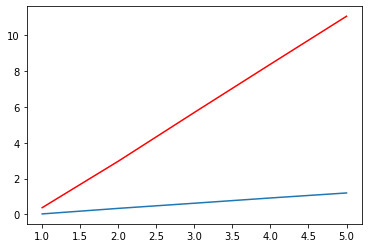

In [42]:
from utils import state_dist_to_activity_dist, BCE

print('MAP:')
print(S_res.shape)
print()
print('MLE:')
print(S_from_T.shape)

start = time.time()
losses_mle = []
losses_map = []

N_steps = 0
for i in range(5):
    N_steps = i+1
    test_encode = one_hot_encode(out_labels[:-N_steps], num_states = out_labels.max() + 1)
    pred_mle = np.power(S_from_T, N_steps)
    pred_map = np.power(S_res, N_steps)
    estimate_mle = pred_mle @ test_encode
    estimate_map = pred_map @ test_encode
    estimate_activity_dist_mle = state_dist_to_activity_dist(estimate_mle, out_labels, activity_vectors)
    estimate_activity_dist_map = state_dist_to_activity_dist(estimate_map, out_labels, activity_vectors)
    targets = lookup_states(out_labels[N_steps:], out_labels, activity_vectors)
    loss_mle = BCE(estimate_activity_dist_mle, targets)
    loss_map = BCE(estimate_activity_dist_map, targets)
    losses_mle.append(loss_mle.mean())
    losses_map.append(loss_map.mean())

losses_mle = np.array(losses_mle)
losses_map = np.array(losses_map)
print('Took ', time.time()-start, 'seconds!')

import matplotlib.pyplot as plt
plt.plot(np.arange(losses_mle.shape[0])+1, losses_mle)
plt.plot(np.arange(losses_map.shape[0])+1, losses_map, c='r')
plt.show()